# Part II - (Ford GoBike System Data)
## by (Shadrack Mwangi)

## Introduction

Congested streets and slow-crawling traffic are a fact of life in many metropolitan areas, such as New York City, Los Angeles, and Chicago. Bike sharing is an innovative solution for such problems, and it works by dispersing a large fleet of publicly-available bikes throughout crowded cities for personal transport.

Implemented in 2013, Ford GoBike is the first bike-sharing system introduced in the US West Coast. Its 540 stations and 7,000 bikes sprawl across five cities in San Francisco Bay Area. A docked bike can be checked out at any station and must be returned to a station when the trip is complete. As a data fanatic, I am excited to explore, using Python, the trip data that has been collected in 2019. 

## Summary of Findings

In this data visualization several features of the bike sharing data were evaluated and visualized. The gender of the riders was evaluated and most riders who used the bike sharing system in the greater San Francisco Area were male. Also, subscribers were more than customers. Older people tend to take bike rides during the day period. The age of riders decreases significantly at night and late night periods. The distance cycled was highest in the day periods and less in night periods. The distance cycled was highest in the evening and morning day periods. The longest rides are in the early morning and morning day periods. The shortest rides are in the night and late night day periods. Most of the trips were in the morning and evening hours. The least was in the late night day period. Weekends are slower for all genders of riders. Tuesdays and Thursdays are the busiest days and has the highest frequencies of rides. The noon day period is when riders spend the most time on their bike trips. Bike riders who do not share rides for the whole trip tend to cycle longer distances. Bike sharing for the whole trip was more frequent in the morning, noon, evening and night day periods, with most of the bike shares in the noon and evening day periods.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy import Point
from geopy.distance import distance

%matplotlib inline

### Loading the data

In [2]:
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_bike.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
97288,989,2019-02-15 08:56:43.2230,2019-02-15 09:13:12.4380,122.0,19th St at Mission St,37.760299,-122.418892,49.0,S Park St at 3rd St,37.780760,-122.394989,1575,Subscriber,1989.0,Female,No
72273,786,2019-02-19 16:34:51.4320,2019-02-19 16:47:57.6970,243.0,Bancroft Way at College Ave,37.869360,-122.254337,259.0,Addison St at Fourth St,37.866249,-122.299371,5074,Subscriber,1971.0,Male,Yes
139942,372,2019-02-07 20:00:26.1960,2019-02-07 20:06:38.2900,16.0,Steuart St at Market St,37.794130,-122.394430,25.0,Howard St at 2nd St,37.787522,-122.397405,4739,Subscriber,NaN,NaN,No
43458,922,2019-02-22 16:25:02.1410,2019-02-22 16:40:24.6680,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,58.0,Market St at 10th St,37.776619,-122.417385,5253,Subscriber,1988.0,Male,No
170735,370,2019-02-04 07:49:54.9420,2019-02-04 07:56:05.8080,162.0,Franklin St at 9th St,37.800516,-122.272080,182.0,19th Street BART Station,37.809013,-122.268247,5144,Subscriber,1980.0,Male,No
173123,1117,2019-02-03 13:08:19.2150,2019-02-03 13:26:56.9050,58.0,Market St at 10th St,37.776619,-122.417385,118.0,Eureka Valley Recreation Center,37.759177,-122.436943,5331,Subscriber,1999.0,Male,No
130240,2138,2019-02-09 17:57:57.3650,2019-02-09 18:33:36.0920,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,101.0,15th St at Potrero Ave,37.767079,-122.407359,5534,Subscriber,1998.0,Male,No
8298,732,2019-02-28 08:24:33.7130,2019-02-28 08:36:46.4010,25.0,Howard St at 2nd St,37.787522,-122.397405,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5844,Subscriber,1979.0,Female,No
105161,865,2019-02-14 07:27:59.8200,2019-02-14 07:42:25.3060,95.0,Sanchez St at 15th St,37.766219,-122.431060,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,6539,Subscriber,1986.0,Female,No
130095,594,2019-02-09 19:35:16.2860,2019-02-09 19:45:11.1070,350.0,8th St at Brannan St,37.771431,-122.405787,58.0,Market St at 10th St,37.776619,-122.417385,901,Subscriber,1993.0,Male,No


In [3]:
# To get the number of columns and rows
ford_bike.shape

(183412, 16)

In [4]:
# To get the column names, number of rows, and datatype.
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# To get the number of null rows in start_station_id colum
sum(ford_bike.start_station_id.isnull())

197

In [6]:
sum(ford_bike.start_station_name.isnull())

197

In [7]:
# To get the number of null rows in member_birth_year column
sum(ford_bike.member_birth_year.isnull())

8265

### Quality Issues

1. hour of day and day can be extracted from the start_time and end_time columns
2. member_birth_year column is a float but it should be an integer
3. Age should be calculated from the member_birth_year.
4. A distance travelled columns needs to be contructed from start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude.
5. Outliers in the created distance_cycled_km about 20.
6. start_time, end_time, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, and member_birth_year columns should be dropped.
7. NAs should be dropped for easier analysis

### Tidiness Issues

1. start_hour column should be transformed into day periods

## Data Cleaning

In [8]:
# creating a copy of the original data
df = ford_bike.copy()

### Issue 1: Creating the hour, day columns from the start_time column.

### Define
The start_time column will first be converted to_datetime and then hour, day, and month will be extracted.

### Code

In [9]:
# Changing the data type of start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Creating columns from the start_time and end_time columns
df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day_name()
df['end_hour'] = df['end_time'].dt.hour
df['end_day'] = df['end_time'].dt.day_name()

### Test

In [10]:
# To check if the new columns have been formed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### Issue 2: Convert the float in the member_gender column

### Define

Use to_numeric to convert the float objects into int64

### Code

In [11]:
# using to_numeric function to change floats into integers
df['member_birth_year'] = pd.to_numeric(df['member_birth_year'], errors = 'coerce').fillna(0).astype('int64')

### Test

In [12]:
# using sample to check if the float has been removed
df['member_birth_year'].sample(4)

37631     1990
145667    1991
95272     1993
124094    1977
Name: member_birth_year, dtype: int64

### Issue 3: Create an age column from the member_gender column

### Define

Substract 2019 from the age column to create an age column

### Code

In [13]:
# using lambda and lambda to iterate and get the difference from 2019
df['member_age'] = df['member_birth_year'].apply(lambda x: 2019 - x)

### Test

In [14]:
# Using sample to check if new column has ages
df['member_age'].sample(5)

93832     23
94507     42
170336    24
81718     42
101001    26
Name: member_age, dtype: int64

### Issue 4: A distance travelled columns needs to be contructed from start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude.

### Define

Use haversine function to calculate distance between two points

### Code

In [15]:
# Use geopy and Point to create a location
df['point1'] = df.apply(lambda row: Point(latitude = row['start_station_latitude'], 
                                          longitude = row['start_station_longitude']), axis = 1)
df['point2'] = df.apply(lambda row: Point(latitude = row['end_station_latitude'], 
                                          longitude = row['end_station_longitude']), axis = 1)

# Calculating the distance between point1 and point2
df['distance_cycled_km'] = df.apply(lambda row: distance(row['point1'], row['point2']).km
                                   if row['point2'] is not None else float (nan), axis =1)

In [16]:
# Checking if a distance column has been formed.
df['distance_cycled_km'].sample(10)

167917    1.356690
90019     1.904609
69074     0.784020
67866     2.702330
94478     0.357506
23821     1.889614
72243     2.699256
8156      4.200159
76696     2.609435
94736     0.542442
Name: distance_cycled_km, dtype: float64

### Issue 5: Delete distance_cycled_km more than 20

#### Define
Use the drop function to drop any value above 20

#### Code

In [17]:
# using drop function to drop the distance cycled more than 20 for easier plotting
df.drop(df[df.distance_cycled_km > 20].index, inplace=True)

#### Test

In [18]:
# Checking if distance above 20 has been removed
sum(df.distance_cycled_km > 20)

0

### Issue 6: Drop start_time, end_time, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, and member_birth_year.

### Define

Using the drop function to eliminate these columns 

### Code

In [19]:
# Dropping the transformed columns since they aren't needed for analysis
df.drop(['start_time', 'end_time', 'start_station_latitude', 'start_station_longitude',
        'end_station_latitude', 'end_station_longitude', 'member_birth_year', 'point1', 'point2'], axis = 1, inplace = True)

In [20]:
# Checking if the columns have indeed been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183411 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183411 non-null  int64  
 1   start_station_id         183214 non-null  float64
 2   start_station_name       183214 non-null  object 
 3   end_station_id           183214 non-null  float64
 4   end_station_name         183214 non-null  object 
 5   bike_id                  183411 non-null  int64  
 6   user_type                183411 non-null  object 
 7   member_gender            175146 non-null  object 
 8   bike_share_for_all_trip  183411 non-null  object 
 9   start_hour               183411 non-null  int64  
 10  start_day                183411 non-null  object 
 11  end_hour                 183411 non-null  int64  
 12  end_day                  183411 non-null  object 
 13  member_age               183411 non-null  int64  
 14  dist

### Issue 7: Dropping the Na's in order to make analysis easier

### Define

Using the dropna function to eliminate null values

### Code

In [21]:
# using dropna and inplace in order to make sure changes are parmanent.
df.dropna(inplace = True)

### Test

In [22]:
# Checking if the columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174951 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174951 non-null  int64  
 1   start_station_id         174951 non-null  float64
 2   start_station_name       174951 non-null  object 
 3   end_station_id           174951 non-null  float64
 4   end_station_name         174951 non-null  object 
 5   bike_id                  174951 non-null  int64  
 6   user_type                174951 non-null  object 
 7   member_gender            174951 non-null  object 
 8   bike_share_for_all_trip  174951 non-null  object 
 9   start_hour               174951 non-null  int64  
 10  start_day                174951 non-null  object 
 11  end_hour                 174951 non-null  int64  
 12  end_day                  174951 non-null  object 
 13  member_age               174951 non-null  int64  
 14  dist

### Tidiness Issue
### Issue 1: Changing the start_hour into different periods of the day

#### Define
Change the start_hour into Early Morning, Morning, Noon, Evening, Night, and Late Night

#### Code

In [23]:
# Dividing 24 by 6 to get six four-hour periods
df['day_period'] = (df['start_hour'] % 24 + 4)//4
# Assigning each value above to a name.
df['day_period'].replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 4: 'Noon',
                          5: 'Evening', 6: 'Night'}, inplace = True)

#### Test

In [24]:
# checking if the names have been assigned successfully.
df['day_period'].sample(4)

103865    Morning
126331    Evening
59299       Night
151665    Evening
Name: day_period, dtype: object

### What is the structure of your dataset?

> The initial dataset, 201902-fordgobike-tripdata.csv, had 183412 rows, 16 columns. The columns were the following: duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are duration_sec, start_time and end_time which were wrangled into hour, day, and month for easier implementation. Also, user_type, member_gender, bike_share_for_all_trips, member_age, and distance_cycled_km which was computed from the longitude and latitude information from the original dataset might be useful.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that I believestart will be important in this investigation are: user_type, member_gender, member_age, distance_cycled_km, start_hour, start_day, and start_month.

## Univariate Exploration

### Question 1: What gender is more likely to be using bike sharing system?

#### Visualization

In [25]:
# calculating the frequency of different genders
gender_counts = df['member_gender'].value_counts()
gender_counts

Male      130500
Female     40804
Other       3647
Name: member_gender, dtype: int64

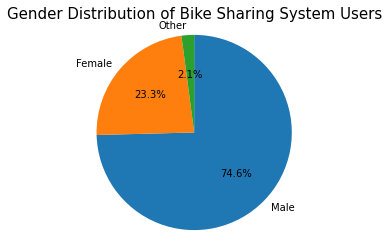

In [26]:
# using .pie to output a pie chart where it has startangle and percentages calculated
plt.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False, autopct= '%1.1f%%')
plt.title('Gender Distribution of Bike Sharing System Users', fontsize = 15)
plt.axis('square');

#### Observations

> 74.6% percent of the people who used the bike sharing system in the greater San Francisco Area were male, 23.3% were females and 2.1 were other gender types. This shows that the biggest beneficiary of the bike sharing system in the greater San Francisco Area are the males.

### Question 2: Are subscibers more than customers?

#### Visualization

In [27]:
# Creating a function for title, xlabel and ylabel
def add_labels(fig, title, xlabel, ylabel):
    plt.title(title, fontsize = 20)
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    return fig

<AxesSubplot:title={'center':'Bike Sharing Program User Type'}, xlabel='Type of Bike Users', ylabel='Number of Bike Rides'>

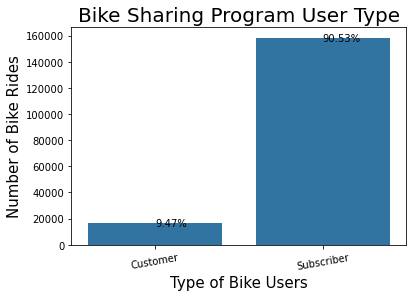

In [28]:
# Calculating the frequency of the user_type column
user_counts = df['user_type'].value_counts()
# Calculating the total sum of user_type column
n_user = df['user_type'].value_counts().sum()

# Using the color_palette in order to make the color uniform
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df, x = 'user_type', color = base_color);
locs, labels = plt.xticks(rotation = 10)

# Using for loop to create percentages for each bar
for loc, label in zip(locs, labels):
    counts = user_counts[label.get_text()]
    percentage = '{:.2f}%'.format(100 * counts/n_user)
    plt.text(loc, counts+1, percentage, va = 'center')

# Creating a function for title, xlabel, and ylabel
add_labels(ax, 'Bike Sharing Program User Type', 'Type of Bike Users', 'Number of Bike Rides')

#### Observation
> The customers are less than 20,000 while there is more than 150,000 subscribers. This means that most of the people who use the bike sharing system are actually bike owners themselves.

### Question 3: What is the age most likely to use bike sharing program?

#### Visualization

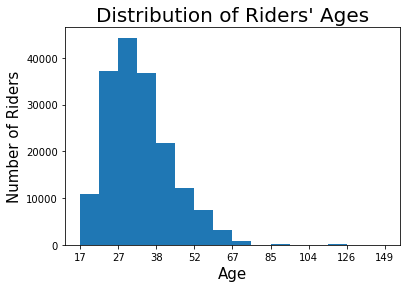

In [29]:
# Creating a square root in order to normalize the member_age data.
def sqrt_trans(x, inverse = False):
    if not inverse:
        return np.sqrt(x)
    else:
        return x**2
    
# modifying the bin edges 
bin_edges = np.arange(4.24, sqrt_trans(df['member_age'].max())+0.5, 0.5)
# transforming the data and the tick_locs
plt.hist(df['member_age'].apply(sqrt_trans), bins=bin_edges)
tick_locs = np.arange(4.24, sqrt_trans(df['member_age'].max())+1, 1)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

# Creating a function for title, xlabel, and ylabel
add_labels(ax, "Distribution of Riders' Ages", 'Age', 'Number of Riders');

#### Observation

> Most of the people who use the biking program are between the ages of 18 to 60. The histogram also shows some outliers from the age of 75. This should be investigated more keenly.

### Question 4: What distance is most travelled by the biking program members?

#### Visualization

In [30]:
# Using .describe() in order to get the bins ranges
df['distance_cycled_km'].describe()

count    174951.000000
mean          1.689552
std           1.084491
min           0.000000
25%           0.909710
50%           1.428159
75%           2.224635
max          15.711156
Name: distance_cycled_km, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

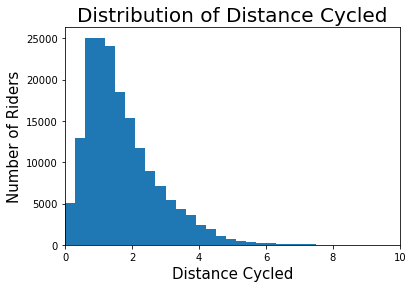

In [31]:
bins = np.arange(0, 69+0.3, 0.3)
plt.hist(data = df, x= 'distance_cycled_km', bins=bins);

# limiting the graph in order for a proper view
plt.xlim(right = 10, left = 0)

# Creating a function for title, xlabel, and ylabel
add_labels(ax, 'Distribution of Distance Cycled', 'Distance Cycled', 'Number of Riders')
plt.show

#### Observations

> Most of the biking trips are between 0 and around 3 kilometers long.

### Question 5: Which are the period of days with most rides?
#### Visualization

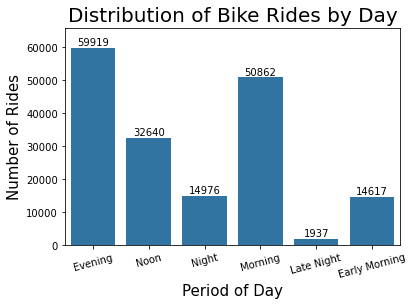

In [32]:
# Using countplot to create a bar graph. base_color was created earlier.
ax = sb.countplot(data = df, x = 'day_period', color = base_color)
plt.xticks(rotation = 15);

# Creating a function for title, xlabel, and ylabel
add_labels(ax, 'Distribution of Bike Rides by Day', 'Period of Day', 'Number of Rides');

# Creating frequency labels for each start station
ax.bar_label(ax.containers[0], label_type = 'edge');
# pad the spacing between the figure and edge of the figure
ax.margins(y = 0.1)

#### Observation

> Evening hours, that is 4:00 pm to 8:00pm, with 59,919 riders, are the time of day when most people engage in bike sharing followed closely by morning hours, with 50,862 riders. The time with the least amount of bike sharing is the late night hours, that is, from midnight to 4:00 am in the morning, with around 1,937 riders.

### Question 6: Which are the most used ride start stations
#### Visualization

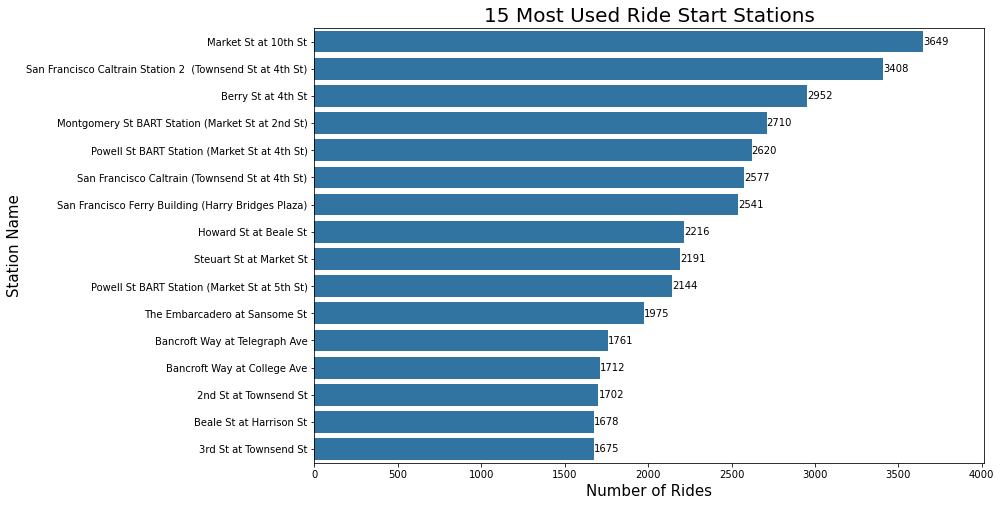

In [33]:
# plot the graph
plt.figure(figsize = (12, 8))
# getting the frequency of start_station_name, getting the first 15 stations and sorting them in a descending order
station_order = df['start_station_name'].value_counts()[15::-1].sort_values(ascending=False)
station_count = station_order.index

# Creating a bar plot using countplot on the y axis
ax = sb.countplot(data = df, y = 'start_station_name', color = base_color, order = station_count)

# Creating a function for title, xlabel, and ylabel
add_labels(ax, '15 Most Used Ride Start Stations', 'Number of Rides', 'Station Name')

# Creating frequency labels for each start station
ax.bar_label(ax.containers[0], label_type = 'edge');
# pad the spacing between the figure and edge of the figure
ax.margins(x = 0.1)

#### Visualization

> The most active ride start station is Market St at 10th St with about 3,649 ride starts. This is followed closely by San Francisco Caltrain Station 3 (Townsend St at 4th St) with 3,408 ride starts.

### What is the most used ride end station?


#### Visualization

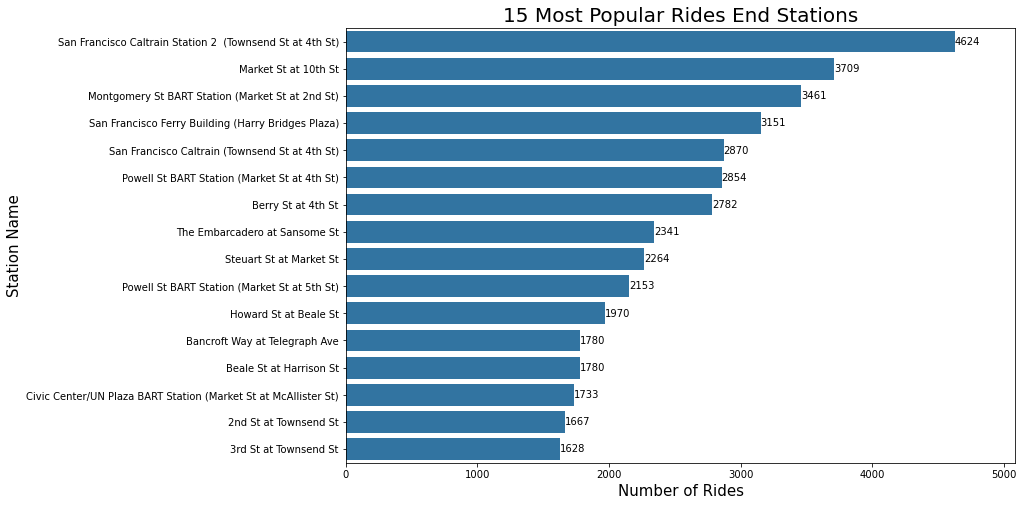

In [34]:
# plot the graph
plt.figure(figsize = (12, 8))

# Getting the frequency fron the end_station_name column, getting the first 15 end stations, and arranging them in 
# descending order
station_order = df['end_station_name'].value_counts()[15::-1].sort_values(ascending=False)
station_count = station_order.index

# Using countplot to create bar charts with the first 15 riders' end stations.
ax = sb.countplot(data = df, y = 'end_station_name', color = base_color, order = station_count) 

# Creating a function for title, xlabel, and ylabel
add_labels(ax, '15 Most Popular Rides End Stations', 'Number of Rides', 'Station Name')

# Creating frequency labels for each start station
ax.bar_label(ax.containers[0], label_type = 'edge');
# pad the spacing between the figure and edge of the figure
ax.margins(x = 0.1)

#### Observation

> San Francisco Caltrain Station 2 (Townsend St at 4th st) was the most used end station with 4,624 rides. This was followed closely by Market St at 10th St with 3,709 less. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Gender of riders: 74.6% of the riders were male, 23.3% were females and 2.1 were others. The number of male riders was unusually high. 

> User type of riders: 90.53% of the riders were subscribers and 9.47% were customers.

> Age of riders: Most riders are between 18 and 60 years of age. A squareroot transformation was performed on the members' age.

> Ride distance: Most of the rides were between 0 and 4 kilometers. 

> Period of day: Most of the trips were in the morning and evening hours. The least was in the late night day period.

> Start station: Market St at 10th St and San Francisco Caltrain Station 3 (Townsend St at 4th St) were the most active start stations.

> Market St at 10th St and San Francisco Caltrain Station 3 (Townsend St at 4th St) were the most active end stations.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Member age had ages upto 140. Square root transformation was performed to normalize the skewness of the data, and to have a better view of the ages of the most active biking members.

## Bivariate Exploration

### Question 8: What time are customers and subscribers most active?

#### Visualization

<AxesSubplot:title={'center':'A Comparison Between User Type and Day Periods'}, xlabel='Day Period', ylabel='Number of Rides'>

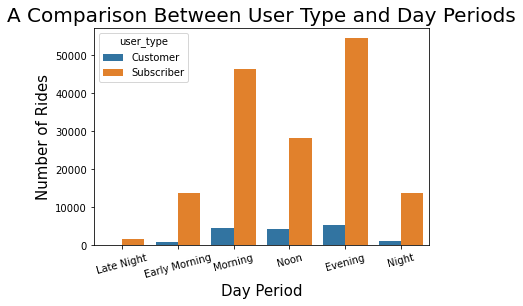

In [35]:
# Creating a categorical variable in the day_period column
day_period_name = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night']
period_name = pd.api.types.CategoricalDtype(ordered = True, categories = day_period_name)
df['day_period'] = df['day_period'].astype(period_name)

# adding hue as user_type in order to compare customes and subscribes in different day periods
ax = sb.countplot(data = df, x = 'day_period', hue = 'user_type');
plt.xticks(rotation = 15);

# Creating a function for title, xlabel, and ylabel
add_labels(ax, 'A Comparison Between User Type and Day Periods', 'Day Period', 'Number of Rides')

#### Observation

> The first observation is that very few customers who take bike rides during the night periods and maybe prefer other means of transit. The second observation is that there are highest number of rides by subscribers duing evening sessions with more than 5,400 followed by the morning rides by subscibers at more than 4,500 bike rides.

### Question 9: What is the relationship between distance cycled and age?

#### Visualization

In [36]:
# using .describe in order to get the correct bins
df['member_age'].describe()

count    174951.000000
mean         34.196867
std          10.118760
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

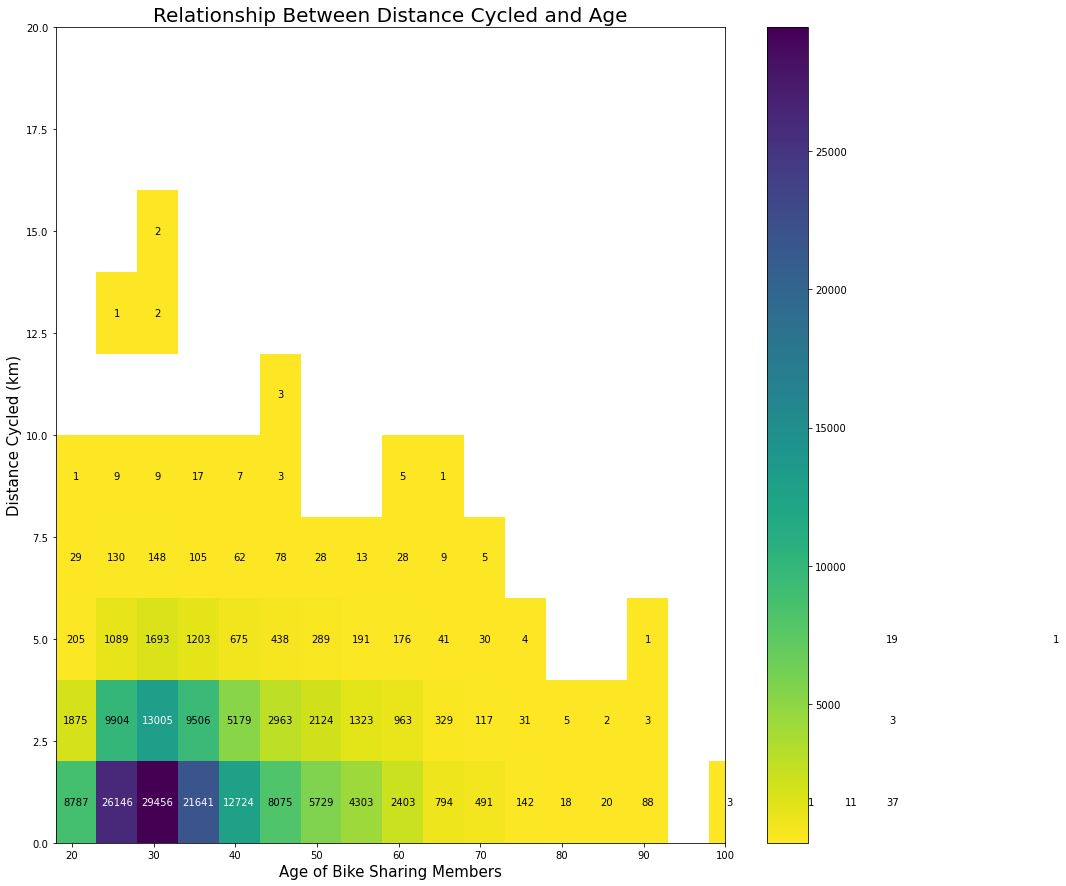

In [37]:
# Creating figsize and bin ranges for the heat map
plt.figure(figsize=(15, 15))
bins_x = np.arange(18, 141+5, 5)
bins_y = np.arange(0, 20+2, 2)

# using hist2d to create a heat map and specifying the bin ranges.
h2d = plt.hist2d(data = df, x = 'member_age', y = 'distance_cycled_km', cmin = 0.5, 
                 cmap = 'viridis_r', bins = [bins_x, bins_y]);

plt.colorbar()

# Creating a function for title, xlabel, and ylabel
add_labels(ax, 'Relationship Between Distance Cycled and Age', 'Age of Bike Sharing Members', 'Distance Cycled (km)')

# creating counts for each bin
counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c >= 10000:
            plt.text(bins_x[i]+2.5, bins_y[j]+1, int(c), ha = 'center', va = 'center', color = 'white');
        elif c > 0:
            plt.text(bins_x[i]+2.5, bins_y[j]+1, int(c), ha = 'center', va = 'center', color = 'black'); 
plt.xlim(right = 100);

#### Observation

> The most active age is from around 28 to 32 years with around 0-2 kilometers, with 29,456 bike trips. Generally the most active age in the bike sharing program was from around 23-year-olds to around 38-year-olds who cycle around 4 kilometers per ride per month.

### Question 10: Did those who bike share for the whole trip travelling a longer distance?

#### Visualization

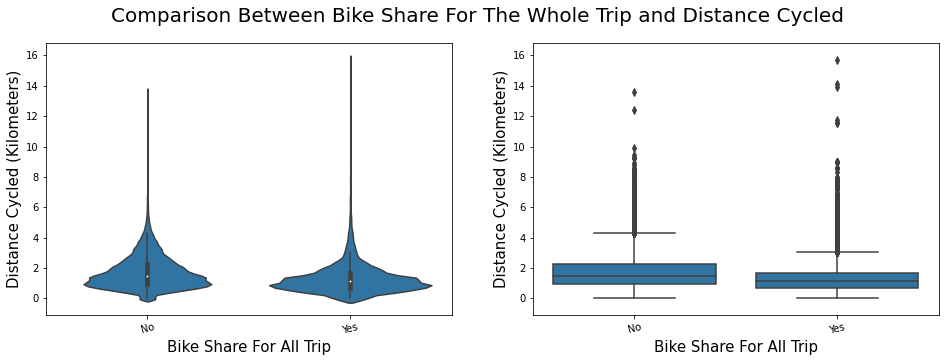

In [38]:
# specifying the figure size
plt.figure(figsize = [16, 5])
# creating the first violinplot. base_color was specified earlier
plt.subplot(1, 2, 1)
ab1 = sb.violinplot(data = df, x = 'bike_share_for_all_trip', y = 'distance_cycled_km', color = base_color);
plt.xticks(rotation = 15);

# creating the second violinplot
plt.subplot(1, 2, 2)
ab2 = sb.boxplot(data = df, x = 'bike_share_for_all_trip', y = 'distance_cycled_km', color = base_color);
plt.xticks(rotation = 15)
plt.ylim(ab1.get_ylim());

# Creating title and x and y labels
ab1.set_xlabel('Bike Share For All Trip', fontsize = 15)
ab1.set_ylabel('Distance Cycled (Kilometers)', fontsize = 15)
ab2.set_xlabel('Bike Share For All Trip', fontsize = 15)
ab2.set_ylabel('Distance Cycled (Kilometers)', fontsize = 15)
plt.suptitle('Comparison Between Bike Share For The Whole Trip and Distance Cycled', fontsize = 20);

#### Observations

> Generally, riders who do not bike share for the whole trip tend to cycle for a longer distance. 

### What is relationship between day period and gender?


#### Visualization

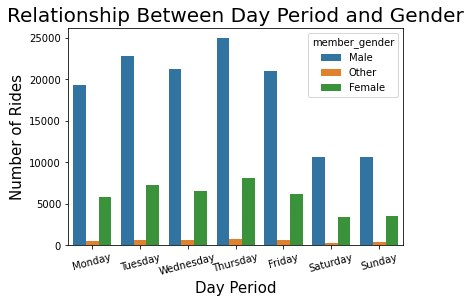

In [39]:
# Creating categorical variable from the start_day column
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_day = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['start_day'] = df['start_day'].astype(week_day)

# Creating a bar graph comparing day period and gender
sb.countplot(data = df, x = 'start_day', hue = 'member_gender')
plt.xticks(rotation = 15);

# Creating a function for title, xlabel, and ylabel
add_labels(ax, 'Relationship Between Day Period and Gender', 'Day Period', 'Number of Rides');

#### Observation

> The frequency of rides for males, females, and others was lowest on saturdays and sundays. The highest frequency of rides for males was on highest on Thursday and Tuesday. The highest frequency of rides for females was also highest on Thursdays and Tuesdays.

### Question 12: What is the relationship between period of day and distance cycled?

#### Visualization

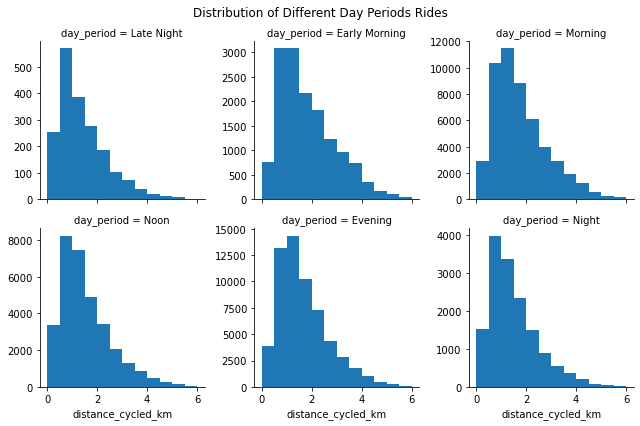

In [40]:
day_period_name = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night']
period_name = pd.api.types.CategoricalDtype(ordered = True, categories = day_period_name)
df['day_period'] = df['day_period'].astype(period_name)

bin_edges = np.arange(0, 6+0.5, 0.5)
g = sb.FacetGrid(data = df, col = 'day_period', col_wrap = 3, sharey = False);
g.map(plt.hist, 'distance_cycled_km', bins = bin_edges);

# Creating a subtitles and titles
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle('Distribution of Different Day Periods Rides');

#### Observation

> The distance cycled by riders in the morning and early morning day periods were the highest. Late night and night day periods tend to have lowest distanced travelled.

### Question 13: Which time of day do cyclists spend most time with they bikes?

#### Visualization

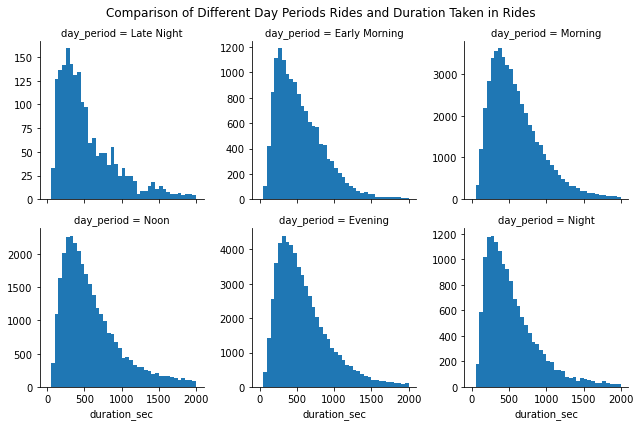

In [41]:
# bins_edges were modified so that a good 
bin_edges = np.arange(0, 2000+50, 50)
g = sb.FacetGrid(data = df, col = 'day_period', col_wrap = 3, sharey = False);
g.map(plt.hist, 'duration_sec', bins = bin_edges);

# Creating a subtitles and titles
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle('Comparison of Different Day Periods Rides and Duration Taken in Rides');

#### Observation

> Riders tend to take shorter time during their rides during the late night and early morning periods. The noon day period is the day period most riders take the longest time on their rides.

### Relationship between distance cycled and time used?

#### Visualization

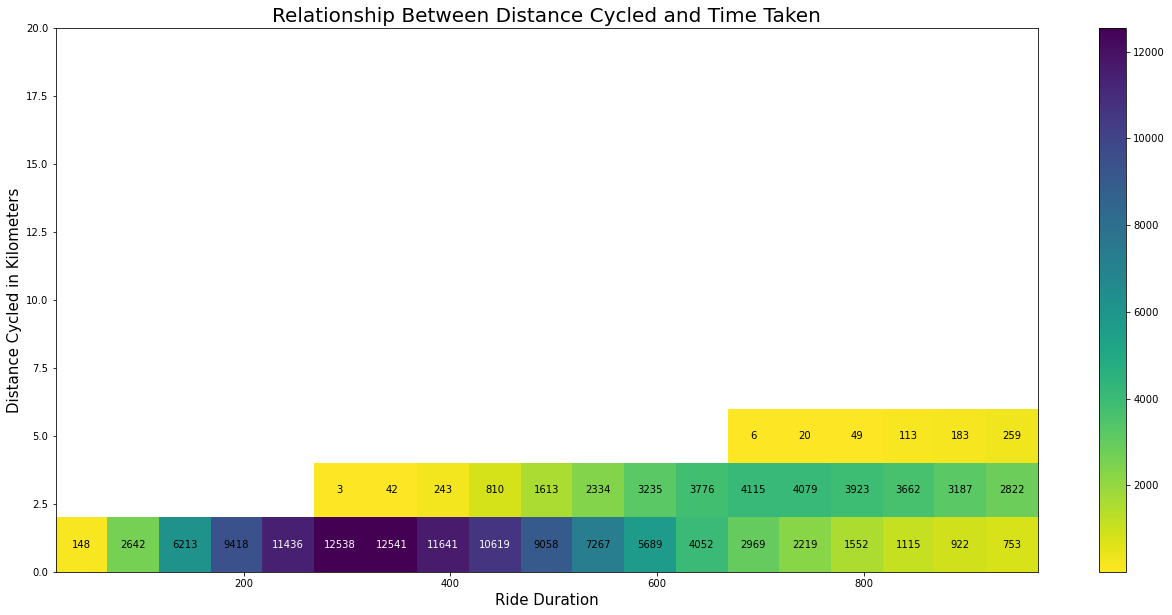

In [42]:
# Setting the fig size and bin sizes
plt.figure(figsize=(22, 10))
bins_x = np.arange(18, 1000, 50)
bins_y = np.arange(0, 20+2, 2)
h2d = plt.hist2d(data = df, x = 'duration_sec', y = 'distance_cycled_km', cmin = 0.5, 
                 cmap = 'viridis_r', bins = [bins_x, bins_y]);

# To create a colormap based on frequency of values
plt.colorbar()

counts = h2d[0]

# using for loop to specify range of values and the color they will appear in.
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c >= 10000:
            plt.text(bins_x[i]+25, bins_y[j]+1, int(c), ha = 'center', va = 'center', color = 'white');
        elif c > 0:
            plt.text(bins_x[i]+25, bins_y[j]+1, int(c), ha = 'center', va = 'center', color = 'black'); 
            
# Creating a function for title, xlabel, and ylabel
add_labels(ax, 'Relationship Between Distance Cycled and Time Taken', 'Ride Duration', 'Distance Cycled in Kilometers');

#### Observation

> The most common bike share rides are between 300 and 600 minutes, and with distance travelled of less about two kilometers. This means that most people that use the bike sharing service use it for less than 10 minutes but for more than 3 minutes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Customers and subscribers frequency of bike rides: Customers do not take a significant amount of rides at night. The     frequency of subscribers riders tend to peak in evening and morning hours. 

> Relationship between age and distance cycled: The most active age of riders was between around 24 years to around 38 years. Their rides were between 0 and 4 kilometers per ride with around 29,456 rides per month for the riders between 28 and 32 years of age.

> Bike riders who do not share rides for the whole trip tend to cycle longer distances.

> Relationship between frequency of rides and days of the weeks. Weekends are slower for all genders of riders. Tuesdays and Thursdays are the busiest days and has the highest frequencies of rides.

> The longest rides are in the early morning and morning day periods. The shortest rides are in the night and late night day periods.

> The noon day period is when riders spend the most time on their bike trips.

> Most of the bike rides are between 3 minutes and 10 seconds and are about two kilometers long.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The most interest relationship was that riders between the age of 28 and 32 were the most active riders. 

## Multivariate Exploration

### What is the relationship between distance cyled, age, bike share for all trip, and day time periods?

#### Visualization

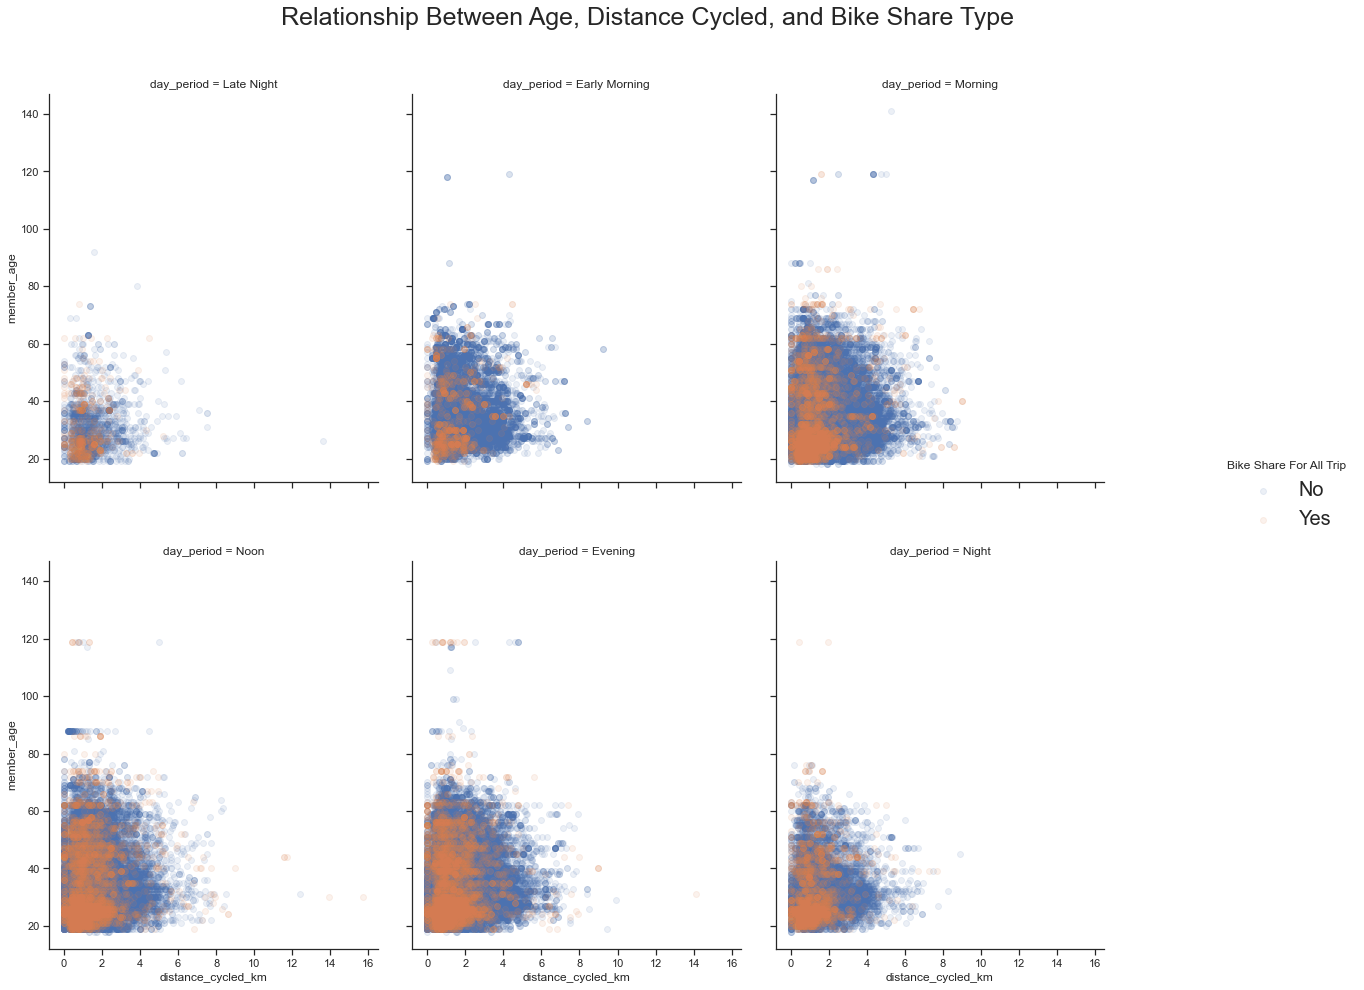

In [43]:
sb.set(style = 'ticks', color_codes = True)
g = sb.FacetGrid(data = df, col = 'day_period', height = 3, legend_out = True,
                 hue = 'bike_share_for_all_trip', margin_titles = True, col_wrap = 3)
g.map(plt.scatter, 'distance_cycled_km', 'member_age', alpha = 0.1);

# In order to get a title in place and specify the fontsize
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle('Relationship Between Age, Distance Cycled, and Bike Share Type', fontsize = 25)

# Adding the legend
legend = g.add_legend(title = 'Bike Share For All Trip', fontsize = 20, title_fontsize = 25)
g.fig.set_size_inches(20, 15)

#### Observations

> During the late night day period, most of the riders who were active are below the age of 40 and cycled below two kilometers. Also, there was very low incidences not bike share for the whole trip during this time period.

> During the early morning day period, most of riders who were active were below the age of 60, and cycled below four kilometers. Also, there was very low incidences of bike share for the whole trip in this early morning time period.

> During the morning day period, most of riders were below the age of 60 and cycled below 5 kilometers per trip. There were also high incidences of bike sharing for the whole trip. They used the bike sharing program and didn't using another means of transport

> During the noon period, most of the riders were below the age of 60, and cycled four kilometers and below. There were high incidences of bike sharing for the whole trip, and riders didn't tend to use other means of transport if they were using the bike sharing program.

> During the evening day period, most of the riders were about 60 years of age and below, cycling around 5 kilometers. There was also a high number of riders who were not bike sharing for the whole trip.

> During the night period, most of the riders were around 50 years of age, and were cycling a distance of 4 kilometers and below.There was also less incidences of riders who didn't bike share for the whole trip

### What is the relationship between age, distance cycled, and distance cycled?

#### Visualizations

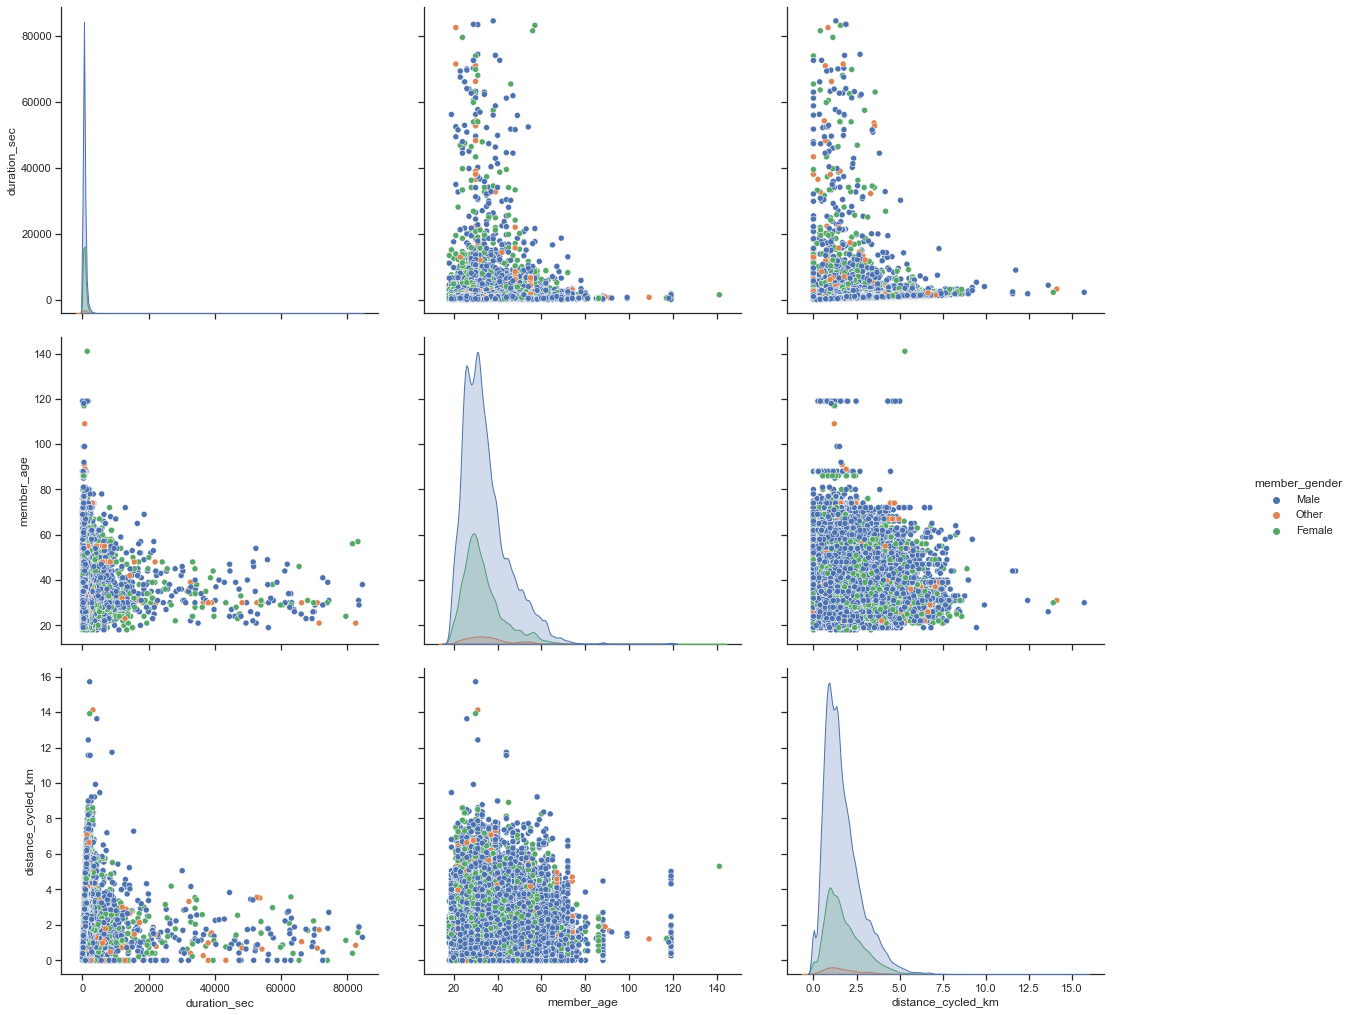

In [44]:
sb.set(style = 'ticks', color_codes = True)
g = sb.pairplot(data = df, vars = ['duration_sec', 'member_age', 'distance_cycled_km'], hue = 'member_gender');
g.fig.set_size_inches(20, 15)

#### Observations

> Majority of cyclists took very short trips.
> Majority of the cyclists are below the age of 80. Also, majority of the trip were below 20,000 seconds or were less than six hours. Majority of the riders is evidently males. Although it's not crystal clear, there is a negative correlation between distance cycled and age. Younger people tend to cycle more kilometers than old folks.
> Most of the trips are below 10 kilometers.

### What is the relationship between age and distance cycled on different days of the week for male subscribers?

#### Visualization

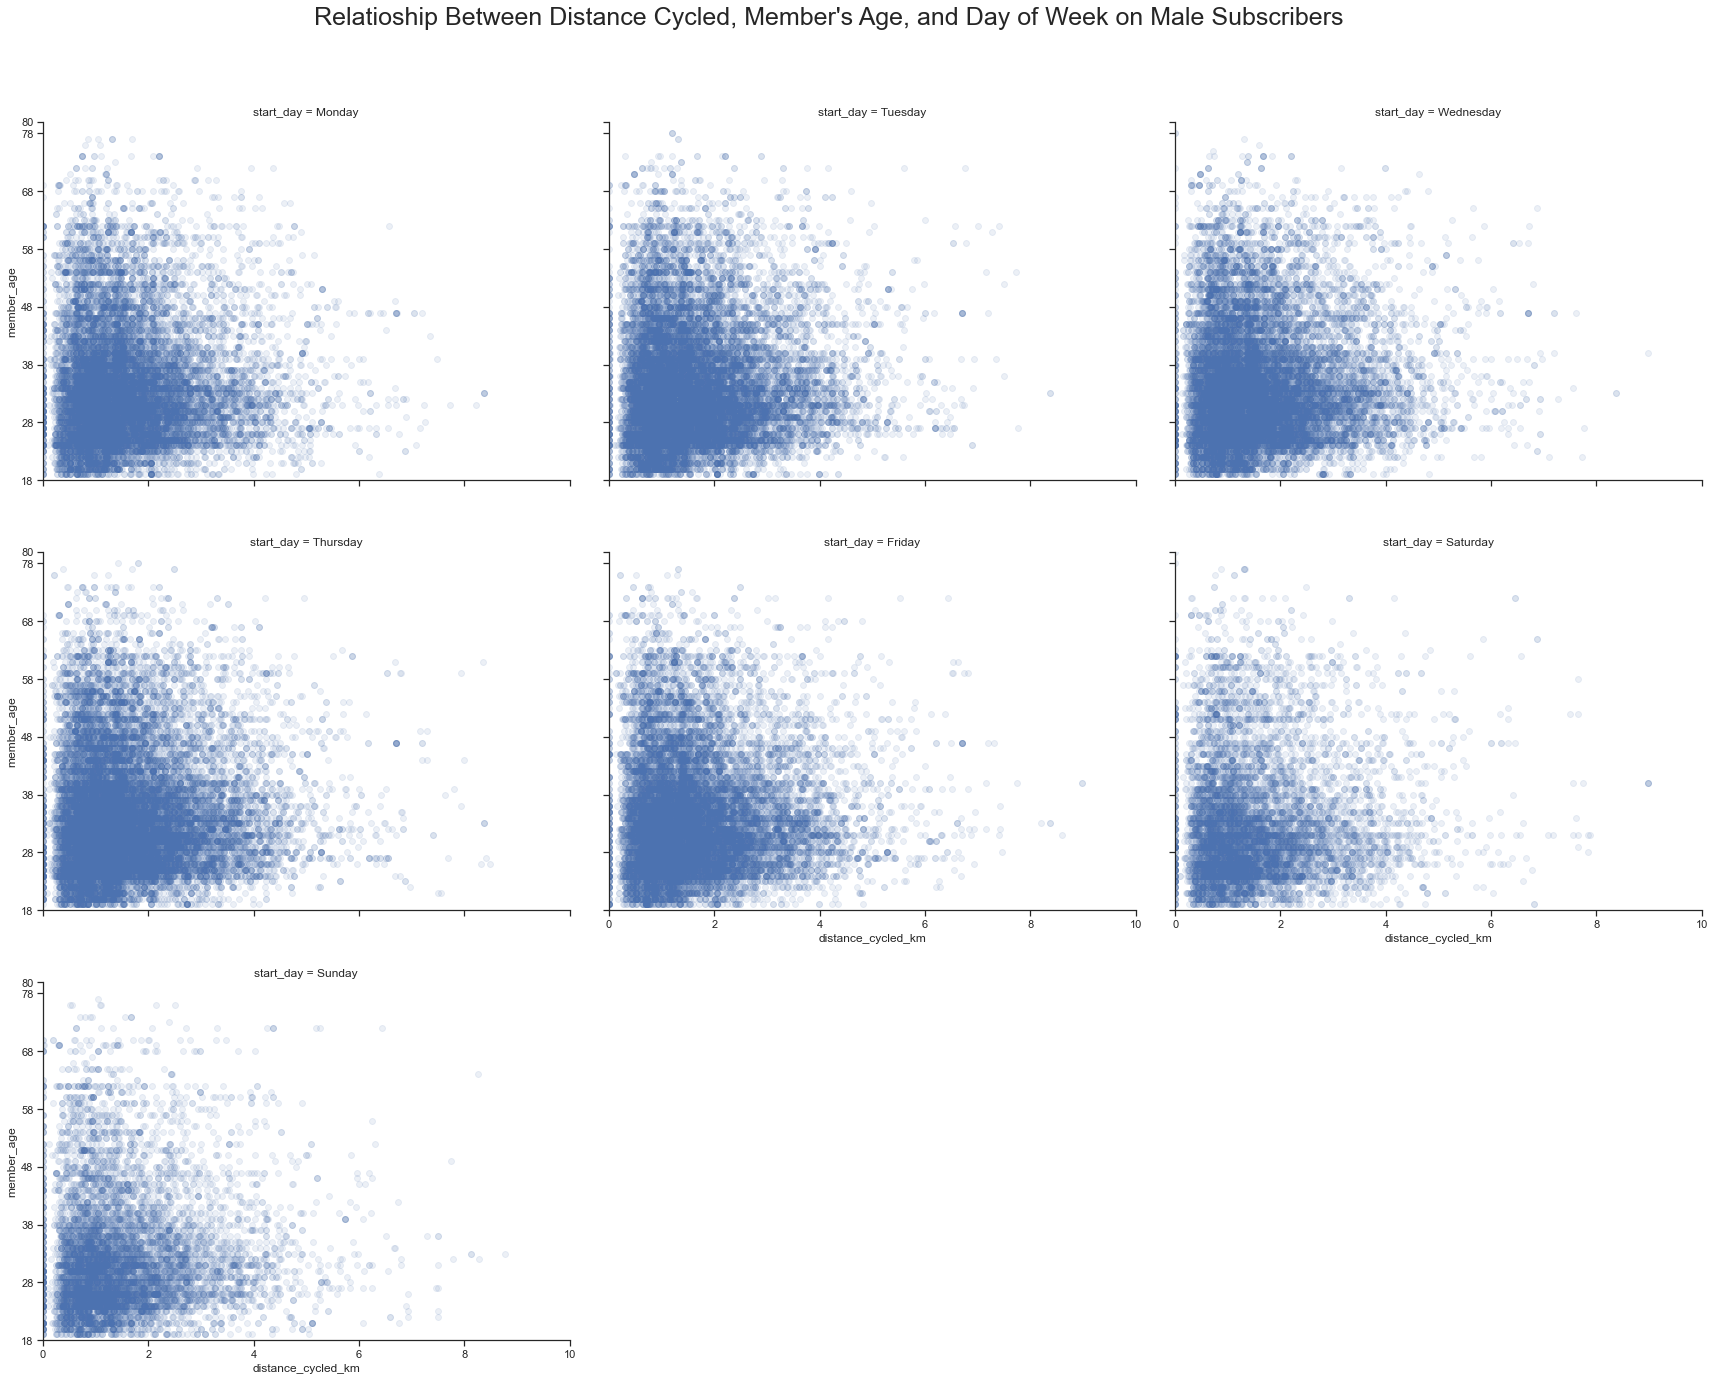

In [45]:
## Using str.contains to get the male subscribers.
subscriber = df[df['user_type'].str.contains('Subscriber')]
male_subscriber = subscriber[subscriber['member_gender'].str.contains('Male')]

sb.set(style = 'ticks', color_codes = True)
g = sb.FacetGrid(data = male_subscriber, col = 'start_day', height = 4, legend_out = True,
                 margin_titles = True, col_wrap = 3)
g.map(plt.scatter, 'distance_cycled_km', 'member_age', alpha = 0.1);

# In order to get a title in place and specify the fontsize
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle("Relatioship Between Distance Cycled, Member's Age, and Day of Week on Male Subscribers", fontsize = 25)

# Adding figure size
g.fig.set_size_inches(25, 20)
# setting the xlim and ylim
g.set(xlim=(0, 10), ylim=(18, 80), xticks=[0, 2, 4, 6, 8, 10], yticks=[18, 28, 38, 48, 58, 68, 78, 80]);

#### Observations

> During work days, male subscribers frequency of trips is higher than on weekends. On weekends, most of the male subscribers bike trips are evidently shorter, around two kilometers, and on week days the trips are longer. 

> Also, most of the male subscribers on weekends are younger than on week days where riders tend to be older. Most of the male subscribers on weekends are below the age of 40 while on weekdays, most of the riders are below 50 years of age.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Bike sharing for the whole trip was more frequent in the morning, noon, evening and night day periods, with most of the bike shares in the noon and evening day periods. 

> Older people tend to take bike rides during the day period, i.e., in the morning, noon, and evening periods. The age of riders decreases significantly at night and late night periods. 

> The distance cycled was highest in the day periods and less in night periods, The distance cycled was highest in the evening and morning day periods.

> Most bike rides were less than 6 hours, riders were less than 80 years of age, and most bike trips were not more than 10 kilometers.

> The frequency of trips of male subscribers was significantly less on weekends than on weekdays. Also, the distance cycled and age of the cyclists was significantly less during weekends than it was on weekdays.


### Were there any interesting or surprising interactions between features?

> The number of bike shares was significantly less in the early morning day period while the frequency of bike trips was relatively high in the morning periods. There is a negative correlation between age and duration of the trip.  

## Conclusions

> In this data visualization several features of the bike sharing data were evaluated and visualized. The gender of the riders was evaluated and 74.6% percent of the people who used the bike sharing system in the greater San Francisco Area were male, 23.3% were females and 2.1 were other gender types.  

> 90.53% of the riders were subscribers and 9.47% were customers. Customers do not take significant rides at night. The cyclists who ride at evening and morning day periods are the highest.

> The active riders are mostly between 18 and 60 years of age but the most active bikers are between ages 24 and 38. The highest frequency of rides by age was in between ages 28 and 32, with 29,456 rides. Also, the frequency of trips of male subscribers was significantly less on weekends than on weekdays. Older people tend to take bike rides during the day period. The age of riders decreases significantly at night and late night periods.

> Overall, majority of the rides are between 0 and 4 kilometers. The distance cycled was highest in the day periods and less in night periods. The distance cycled was highest in the evening and morning day periods. The longest rides are in the early morning and morning day periods. The shortest rides are in the night and late night day periods.

> Most of the trips were in the morning and evening hours. The least was in the late night day period. Weekends are slower for all genders of riders. Tuesdays and Thursdays are the busiest days and has the highest frequencies of rides. The noon day period is when riders spend the most time on their bike trips.

> Market St at 10th St and San Francisco Caltrain Station 3 (Townsend St at 4th St) were the most active start stations. Market St at 10th St and San Francisco Caltrain Station 3 (Townsend St at 4th St) were the most active end stations.

> Bike riders who do not share rides for the whole trip tend to cycle longer distances. Bike sharing for the whole trip was more frequent in the morning, noon, evening and night day periods, with most of the bike shares in the noon and evening day periods. 

In [ ]:
!jupyter nbconvert Part_II_Fordgobike_slide_deck.ipynb --to slides --post serve --no-input --no-prompt